In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import numpy as np
import pandas as pd
import os

In [20]:
#Extract the data from the pickle file
features_data = pd.read_pickle("features.pkl")
features_data = features_data.drop(columns=['random_feature'])

num_subjects=15
train_test_split=0.3

#Split data into
#TO ADD

#Redo numbering of subjects
features_data.loc[features_data['subject'] == 16, 'subject'] = 1
features_data.loc[features_data['subject'] == 17, 'subject'] = 12


#######################################################################

#Remove the subject and label collums and normalize
features_data_turncated = features_data.drop(columns=['label', 'subject'])
scaler = preprocessing.StandardScaler()
features_data_scaled = pd.DataFrame(scaler.fit_transform(features_data_turncated))
features_data_scaled = features_data_scaled.join(features_data['label'])
features_data_scaled = features_data_scaled.join(features_data['subject'])

#Create shuffeled subject array
subject_array = np.arange(1, num_subjects+1)
np.random.shuffle(subject_array)

#Split dataset into test and train
num_test_subjects = round(num_subjects * train_test_split)
num_train_subjects = num_subjects - num_test_subjects
test_data = pd.DataFrame()
train_data = pd.DataFrame()
for ts_sub in range(0, num_test_subjects):
    test_data = pd.concat((test_data, features_data_scaled.loc[features_data_scaled['subject'] == subject_array[ts_sub]]))
for tr_sub in range(num_test_subjects, num_subjects):
    train_data = pd.concat((train_data, features_data_scaled.loc[features_data_scaled['subject'] == subject_array[tr_sub]]))

X_train = train_data.drop(columns=['label', 'subject']).to_numpy()
Y_train = train_data['label'].to_numpy()
x_test = test_data.drop(columns=['label', 'subject']).to_numpy()
y_test = test_data['label'].to_numpy()

#Split the data into a train and test set
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
x_test = scaler.transform(x_test)

In [9]:
# pca = PCA(n_components=10)
# pca_features = pd.DataFrame(pca.fit_transform(features_data_turncated))
# #pca_features.join(features_data['subject'])

# # pca_features = features_data_turncated
# print(pca_features)

               0          1          2         3         4         5  \
0    -270.743249  20.795676   0.835935 -3.002686 -1.328443  1.946761   
1    -646.614551 -11.589219   0.357396 -2.384207 -2.429503  0.675609   
2      50.386055  -9.519666 -10.143543 -3.798764 -2.550811  3.615160   
3      42.453306 -25.877603 -14.120875 -3.977298 -3.016076 -1.212256   
4      33.357327  -3.073802   0.063034 -2.262763 -4.807183 -1.695038   
..           ...        ...        ...       ...       ...       ...   
723   916.072406  67.692401  13.099928 -1.315886  2.811891  1.380268   
724   717.005374  83.553448  12.978727 -3.785372  1.471620  0.053791   
725  -427.040735  92.097422  20.793229 -2.648386  0.345992 -0.713010   
726 -1920.883108  49.783855  20.736229 -5.576318 -1.469916 -0.081438   
727 -1338.966942  72.156592  18.558294 -3.211390 -0.164884  1.707603   

            6         7         8         9  
0   -0.492701 -0.053924 -0.435217  0.093159  
1   -0.017713 -0.359456 -0.392887  0.175052

Below the train data is fitted using the following classifiers: Random Forest Classifier, Random Forest Regressor, Decision Tree Regressor, Support Vector Machine, Neural Support Vector Machine, Linear Regression, Bernoulli

In [27]:
#Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import NuSVC,SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB

from sklearn.datasets import make_classification

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix


switch={
        "RandomForest": RandomForestClassifier().fit(X_train, Y_train),
        "KNeighbors": KNeighborsClassifier(n_neighbors = 20).fit(X_train, Y_train),
        "AdaBoost": AdaBoostClassifier().fit(X_train, Y_train),
        "DecisionTree": DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train),
        "SVM": SVC(kernel='rbf').fit(X_train, Y_train),
        "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis().fit(X_train, Y_train),
        "BernoulliNB": BernoulliNB().fit(X_train, Y_train)
    }

#Fit data using classifiers and calculate accuracy
#Random Forest Classifier
classifier_RFC = switch.get("RandomForest", "Invalid input")
y_pred_RFC = classifier_RFC.predict(x_test)
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
mse_RFC = mean_squared_error(y_test, y_pred_RFC)

#K-Nearest Neighbors Classifier
classifier_KNE = switch.get("KNeighbors", "Invalid input")
y_pred_KNE = classifier_KNE.predict(x_test)
accuracy_KNE = accuracy_score(y_test, y_pred_KNE)
mse_KNE = mean_squared_error(y_test, y_pred_KNE)

#Adaboost Classifier
classifier_ADA = switch.get("AdaBoost", "Invalid input")
y_pred_ADA = classifier_ADA.predict(x_test)
accuracy_ADA = accuracy_score(y_test, y_pred_ADA)
mse_ADA = mean_squared_error(y_test, y_pred_ADA)

#Decision Tree Regressor
classifier_DTC = switch.get("DecisionTree", "Invalid input")
y_pred_DTC = classifier_DTC.predict(x_test)
accuracy_DTC = accuracy_score(y_test, y_pred_DTC)
mse_DTC = mean_squared_error(y_test, y_pred_DTC)

#Support Vector Machine
classifier_SVM = switch.get("SVM", "Invalid input")
y_pred_SVM = classifier_SVM.predict(x_test)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
mse_SVM = mean_squared_error(y_test, y_pred_SVM)

#Neural Support Vector Machine
#classifier_NSVM = NuSVC(kernel='linear')
#classifier_NSVM.fit(X_train, Y_train)
#y_pred_NSVM = classifier_NSVM.predict(x_test)
#accuracy_NSVM = accuracy_score(y_test, y_pred_NSVM)
#mse_NSVM = mean_squared_error(y_test, y_pred_NSVM)

#Linear Discriminant Analysis
classifier_LDA = switch.get("LinearDiscriminantAnalysis", "Invalid input")
y_pred_LDA = classifier_LDA.predict(x_test)
accuracy_LDA = accuracy_score(y_test, y_pred_LDA)
mse_LDA = mean_squared_error(y_test, y_pred_LDA)

#Bernoulli
classifier_BNB = switch.get("BernoulliNB", "Invalid input")
y_pred_BNB = classifier_BNB.predict(x_test)
accuracy_BNB = accuracy_score(y_test, y_pred_BNB)
mse_BNB = mean_squared_error(y_test, y_pred_BNB)

print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Random Forrest Classifier', accuracy_RFC*100, mse_RFC))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('K-Nearest Neighbors Classifier', accuracy_RFC*100, mse_RFC))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Adaboost Classifier', accuracy_ADA*100, mse_ADA))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Decision Tree Classifier', accuracy_DTC*100, mse_DTC))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Support Vector Machine', accuracy_SVM*100, mse_SVM))
#print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Neural Support Vector Machine', accuracy_NSVM*100, mse_NSVM))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Linear Discriminant Analysis', accuracy_LDA*100, mse_LDA))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Bernoulli', accuracy_BNB*100, mse_BNB))

Random Forrest Classifier Accuracy, MSE: 71.57%, 1.17
K-Nearest Neighbors Classifier Accuracy, MSE: 71.57%, 1.17
Adaboost Classifier Accuracy, MSE: 56.35%, 1.30
Decision Tree Classifier Accuracy, MSE: 70.56%, 1.21
Support Vector Machine Accuracy, MSE: 60.91%, 1.48
Linear Discriminant Analysis Accuracy, MSE: 63.96%, 1.39
Bernoulli Accuracy, MSE: 45.69%, 1.88


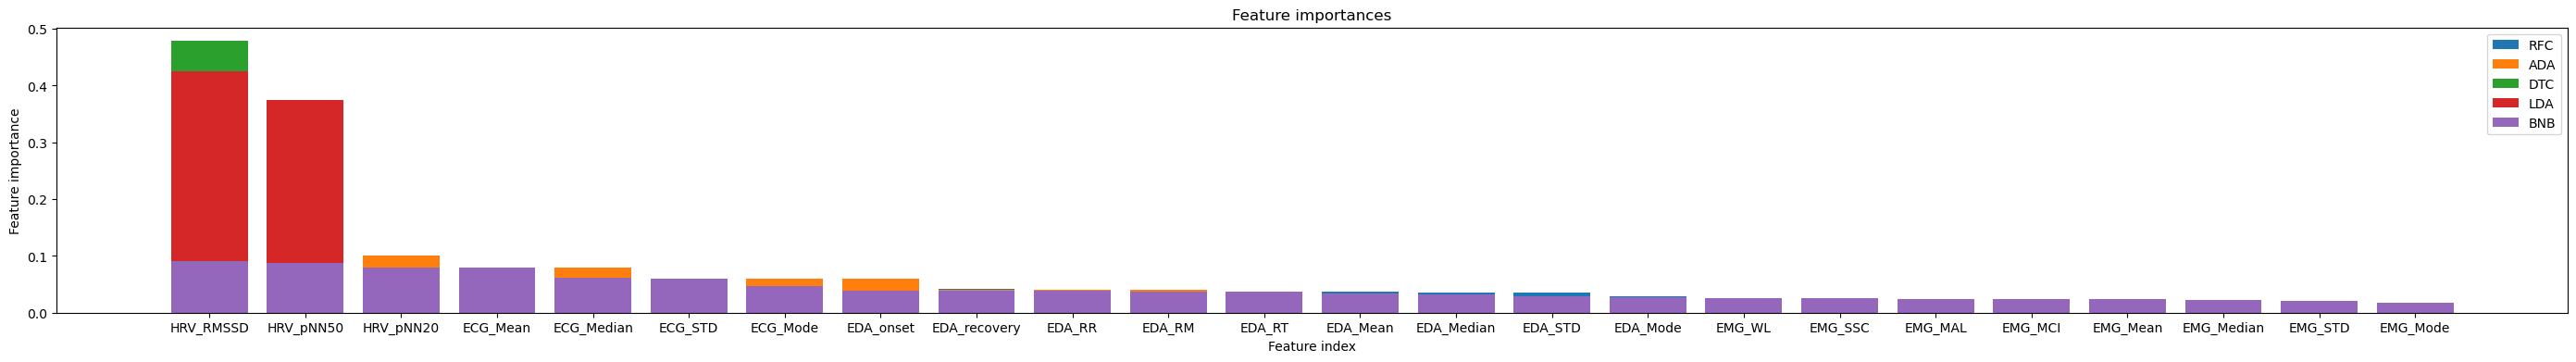

In [70]:
from sklearn.inspection import permutation_importance

# Get feature importances
importances_RFC = classifier_RFC.feature_importances_

importances_ADA = classifier_ADA.feature_importances_

importances_DTC = classifier_DTC.feature_importances_

importances_LDA = np.linalg.norm(classifier_LDA.coef_, axis=0) / np.sqrt(np.sum(classifier_LDA.coef_**2))
importances_LDA = np.array(importances_LDA / min(importances_LDA))
importances_LDA = importances_LDA / sum(importances_LDA)

importances_BNB = np.linalg.norm(classifier_BNB.feature_log_prob_, axis=0) / np.sqrt(np.sum(classifier_BNB.feature_log_prob_**2))
importances_BNB = np.array(importances_BNB / min(importances_BNB))
importances_BNB = importances_BNB / sum(importances_BNB)

#importances_SVM = permutation_importance(classifier_SVM, x_test, y_test).importances_mean

# Sort feature importances in descending order
indices_RFC = np.argsort(importances_RFC)[::-1]
indices_ADA = np.argsort(importances_ADA)[::-1]
indices_DTC = np.argsort(importances_DTC)[::-1]
indices_LDA = np.argsort(importances_LDA)[::-1]
indices_BNB = np.argsort(importances_BNB)[::-1]

# Plot the feature importances
plt.figure()
plt.rcParams['figure.figsize'] = [35, 4]
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances_RFC[indices_RFC], align="center")
plt.bar(range(X_train.shape[1]), importances_ADA[indices_ADA], align="center")
plt.bar(range(X_train.shape[1]), importances_DTC[indices_DTC], align="center")
plt.bar(range(X_train.shape[1]), importances_LDA[indices_LDA], align="center")
plt.bar(range(X_train.shape[1]), importances_BNB[indices_BNB], align="center")
plt.xticks(range(X_train.shape[1]), list(features_data_turncated.columns))
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.legend(["RFC", "ADA", "DTC", "LDA", "BNB", "SVM"])
plt.show()

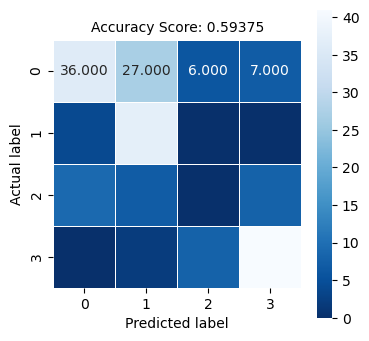

In [101]:
cm = confusion_matrix(y_test, y_pred_RFC)
score = classifier_.score(x_test, y_test)

import seaborn as sns

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);